# Supplementary Code for BDATA 200 Projects

Included in this iPy Notebook are the core functions and work for 
the data analysis performed in the project. The most interesting function is probably the CDFMaker. The subheadings correspond with the function names for quick reference. Left out of this, is the KS-Testing against all the different distributions as this is such a compute intensive task. Instead of potentially locking up the notebook (Even if it is a smaller sample) for at least half an hour I decided to omit this code from this notebook, it is just a loop that changes the parameters to match the data for 90 distributions. It took a VERY long time to wait for that process to complete.

## Accessing the Data from IBM and Importing Packages

The data in this study comes from the US Bureau of Transportation Statistics, but is
made available through *IBM's Airline Reporting Carrier On-Time Performance Dataset*. So beyond importing the packages, this cell makes use of code provided by IBM to access the data in a useable format.

Included at the bottom is a sample of the data to save on compute-time in testing.

In [1]:
import statsmodels.formula.api as smf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pylab
data_path = "airline_2m.csv"
#CSV Can be directly downloaded as a tar file here: 

#https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/airline_2m.tar.gz?_ga=2.241493383.460169643.1645306071-17791737.1643504108

# Credit to IBM's Airline Dataset for the data and encoding code.


data = pd.read_csv(data_path, encoding = "ISO-8859-1",
                 dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str})
#Code Provided By IBMs Airline Reporting Carrier on-time performance set. 
#This helps python better interpret the data frame because it is not encoded in UTF-8 
#An alternative to this could be to actually change the file to be encoded in UTF-8
#but this was difficult to do with how big the file was.


In [171]:
sample = data.sample(80000)
#sample = sample[sample['AirTime'].notna()]
sample['ArrDelay'] = sample['ArrDelay'].fillna(0)
sample['DepDelay'] = sample['DepDelay'].fillna(0)
#Create Sample For Examples

### originDelays

In [286]:
def originDelays(df, orig, desto):
    """
    This Function Takes in a dataframe from the Airline Dataset. 
    Then the Data is isolated strictly to the 1 dimensional frame of Arrival
    Delays for flights from one airport (IATA location ID) to another airport (" ").
    The function also provides the KS-test results for the Norm and NCT of the given
    route combination.
    
    The arguments follow this format:
    
    originDelays(dataframe,string,string)
    
    
    """
    originSubset = df[df['Origin'] == orig]
    originSubset = originSubset[originSubset['Dest'] == desto ]
    #Shaves the DataFrame so that we are just looking at origin rows
    #Then cuts out desired destinations.
    
    print(originSubset['Origin'])
    #Print Statement To verify the Origin
    print(originSubset['Dest'])
    #Print Statement to verify the Destination

    arvl_delay = originSubset['ArrDelay'].fillna(0)
    #Takes out the Arrival Delay column, adds 0 for the NA spots 
    #NA spots infer no delay from IBMs Dataset
    
    qData = arvl_delay
    #Rename for sake of callability
    
    plt.hist(arvl_delay, bins='auto')
    #Constructs the histogram with automatic sizing
    plt.xlabel('Delay')
    #Delay in Minutes
    plt.ylabel('Frequency')
    #Plot a histogram for verification of data
    plt.show()
    
    print(stats.describe(qData))
    #Descriptive statistics to compare with Histogram
    
    sm.qqplot(qData, stats.norm, fit=True,line ='45', color = 'r')
    #The Normal Distribution Q-Q Plot
    
    sm.qqplot(qData, stats.nct, fit=True,line ='45', color = 'b')
    #The Skewed Normal Distribution Q-Q Plot
    
    
    plt.show()
    
    dist_norm = getattr(stats,'norm')
    #gets norm Distribution
    dist_nct = getattr(stats,'nct')
    #gets NCT distribution
    
    parameters_norm = dist_norm.fit(qData)
    parameters_nct = dist_nct.fit(qData)
    #Fits parameters of distributions to data
    
    print("The Norm:" , stats.kstest(qData, "norm", parameters_norm))
    print("The NCT:" , stats.kstest(qData, "nct", parameters_nct))
    #print test results for both tests

    

In [3]:
data
#Example of the Dataframe before any cleaning is done all 
#Notice how all the Diverted Data is not included in any tests


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2008,1,3,23,7,2008-03-23,WN,19393,WN,N712SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999996,1999,1,1,5,2,1999-01-05,CO,19704,CO,N14308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999997,2003,4,11,14,5,2003-11-14,US,20355,US,N528AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999998,2012,2,5,15,2,2012-05-15,WN,19393,WN,N281WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### plotter

In [4]:
def plotter(dataFrame, xColumn, yColumn):
    """
    This function takes in a dataframe, and two column names to 
    compare in a scatter plot.
    The arguments follow this format:
    plotter(dataframe, 'x column' string, 'y column' string) 
    
    """
    x = dataFrame[xColumn]
    y = dataFrame[yColumn]
    #Renamed x and y for clarity in scatter call
    
    plt.scatter(x,y)
    #Construct the scatter plot
    

### ols_model

In [158]:
def ols_model(df,x, y):
    """
    This Function takes in a dataframe and two columns of that 
    data frame to create a ordinary least squares regression and
    prints out a summary
    the arguments follow this format:
    ols_model(dataframe, dataframe[xcolumn],dataframe[ycolumn])
    
    """
    regression = smf.ols(formula = 'y ~ x', data = df).fit()
    #Performs an Ordinary Least Squares Regression
    
    summary = regression.summary()
    print(summary)
    return 

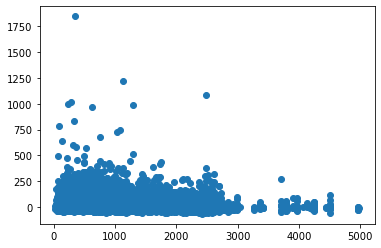

In [283]:
plotter(sample,'Distance','ArrDelay')
#Example Call of Plotter

In [233]:
print(stats.describe(sample['Distance']))
ols_model(sample, sample['AirTime'].dropna(0),sample['Distance'])
#Example Call ols_model
#Used to check the model as Airtime and Distance should have
#An incredibluy strong positive correlation

DescribeResult(nobs=63282, minmax=(21.0, 4983.0), mean=759.0624980247147, variance=338794.6750180988, skewness=1.545571581768947, kurtosis=2.7979051342386727)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.804e+06
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:26:04   Log-Likelihood:            -3.8559e+05
No. Observations:               63282   AIC:                         7.712e+05
Df Residuals:                   63280   BIC:                         7.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

/var/folders/3g/bh_v25hx11qdsybrwgz_x7fm0000gp/T/ipykernel_38694/3528371842.py:2: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only
  ols_model(sample, sample['AirTime'].dropna(0),sample['Distance'])


## cdfMaker

In [279]:
def cdfMaker(columnDf):
    """
    This function takes in a dataframe from the Airline Dataset
    and generates a plot of the PMF and CDF of the selected column
    in the dataframe. The function also returns the PDF and CDF
    For use in other applications.
    The argument follow this format:
    
    cdfMaker(df['columName'])

    """
    
    data = columnDf.fillna(0)
    #Fills in NA entries with 0, this was said to be okay
    #By the Airline Dataset documentation
    
    minutes, binsEdge = np.histogram(data, bins=200)
    #Create histogram named minutes and bin edges names binsEdge
    #Later, the two plots generated will use these
    #in computed values of the plot.
    #The 'minutes' histogram has a bin for each 1 minute interval of time 
    
    pdf = minutes / sum(minutes)
    #each interval of time is divided by total datapoints
    #pdf is the probability density function
    
    # X = "delay in minutes"
    #pdf = P(X = x)
    
    cdf = np.cumsum(pdf)
    #cdf is the cumulative distribution function
    # X = "delay in minutes"
    #cdf = P(X  <= x)
    plt.hist(binsEdge[:-1], binsEdge, weights=minutes)
    plt.show()
    fig, (ax1,ax2) = plt.subplots(2)
    #Creates the figure with 2 subplots
    fig.suptitle('PDF & CDF')
    #Adds title to entire figure
    
    
    ax1.plot(binsEdge[1:], pdf, color="tab:orange", label="PMF")
    #Plots the PMF in orange
    ax2.plot(binsEdge[1:], cdf, color="tab:purple", label="CDF")
    #Plots the CDF in purple.
    
    plt.legend()
    #Shows the legend has ERROR with PMF for now
    return pdf, cdf

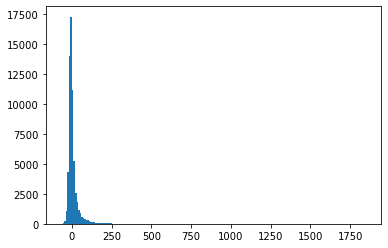

(array([1.10615973e-04, 5.05673019e-04, 3.12885181e-03, 1.75089283e-02,
        6.82816599e-02, 2.21468980e-01, 2.73189849e-01, 1.76321861e-01,
        8.32464208e-02, 4.03116210e-02, 2.81596663e-02, 1.81568218e-02,
        1.39060080e-02, 9.52877596e-03, 7.63250213e-03, 6.30511046e-03,
        5.30956670e-03, 4.39303435e-03, 3.49230429e-03, 2.90761986e-03,
        2.19651718e-03, 2.49676053e-03, 1.50121678e-03, 1.45380993e-03,
        1.04295060e-03, 9.48136911e-04, 9.00730065e-04, 6.95300401e-04,
        7.58509529e-04, 5.37277583e-04, 4.74068455e-04, 4.74068455e-04,
        4.58266174e-04, 2.21231946e-04, 2.05429664e-04, 2.84441073e-04,
        1.58022818e-04, 1.10615973e-04, 1.42220537e-04, 3.16045637e-05,
        1.58022818e-04, 4.74068455e-05, 1.26418255e-04, 4.74068455e-05,
        4.74068455e-05, 3.16045637e-05, 4.74068455e-05, 3.16045637e-05,
        3.16045637e-05, 1.58022818e-05, 3.16045637e-05, 3.16045637e-05,
        1.58022818e-05, 4.74068455e-05, 1.58022818e-05, 0.000000

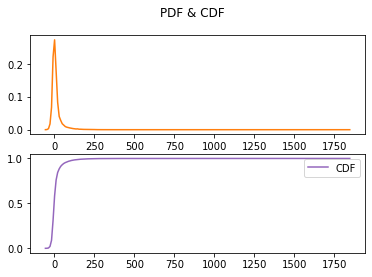

In [285]:
cdfMaker(sample['ArrDelay'].dropna())
#Example Call of CDFMaker

In [272]:
#EXAMPLE OF THE KS-TESTING
#This is not a function as more of just an example
#This process was looped for every distribution
#The list of all the distributions was found in
#the documentation and all 90 were added to a list

dist = getattr(stats, 'norm')
#Get the distribution
#This is different for every distribution test
parameters = dist.fit(sample['ArrDelay'].fillna(0))
#Set the parameters to fit those of the data

print(len(sample['ArrDelay']))
#Print check to make sure this is the correct sample
print(parameters)
#Print of the parameters to check if it matches
#The arguments of the distribution
#The norm as 2 arguments mean and st.dev

stats.kstest(sample['ArrDelay'].fillna(0), "norm", parameters)
#run the test with the parsed CDF parameters from the data

63282
(5.965487816440694, 36.83273672988011)


KstestResult(statistic=0.2169050868996022, pvalue=0.0)

1738727    LAX
1165689    LAX
1140101    LAX
1799261    LAX
793101     LAX
1367274    LAX
1103078    LAX
1177666    LAX
1938597    LAX
31554      LAX
715294     LAX
1870670    LAX
458614     LAX
1359793    LAX
456158     LAX
730164     LAX
1995697    LAX
725952     LAX
70222      LAX
515608     LAX
1373054    LAX
808291     LAX
258007     LAX
1454392    LAX
1229276    LAX
392353     LAX
506529     LAX
1195985    LAX
1149233    LAX
1416952    LAX
1281147    LAX
230360     LAX
1955234    LAX
1481999    LAX
1438264    LAX
1137657    LAX
1185707    LAX
1181229    LAX
1600034    LAX
636861     LAX
39452      LAX
1139943    LAX
1091860    LAX
806461     LAX
823551     LAX
1414745    LAX
1927847    LAX
Name: Origin, dtype: object
1738727    ATL
1165689    ATL
1140101    ATL
1799261    ATL
793101     ATL
1367274    ATL
1103078    ATL
1177666    ATL
1938597    ATL
31554      ATL
715294     ATL
1870670    ATL
458614     ATL
1359793    ATL
456158     ATL
730164     ATL
1995697    ATL
725952     A

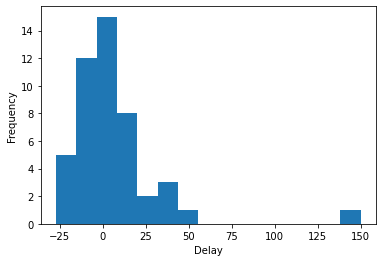

DescribeResult(nobs=47, minmax=(-27.0, 150.0), mean=6.531914893617022, variance=741.7761332099905, skewness=3.235265462245558, kurtosis=14.546185715326708)


/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined 

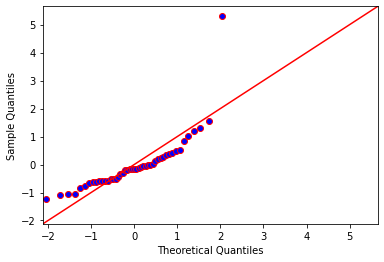

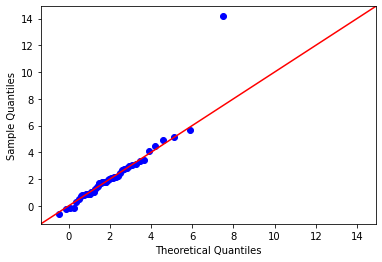

The Norm: KstestResult(statistic=0.17392085008494185, pvalue=0.10301950376021396)
The NCT: KstestResult(statistic=0.0876010486144308, pvalue=0.8327435133312165)


In [276]:
#Example Call of originDelays
originDelays(sample, 'LAX', 'ATL')

/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


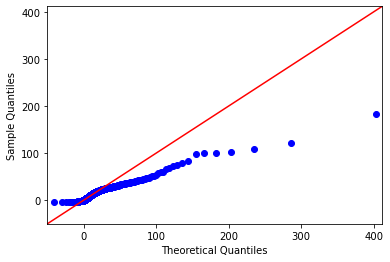

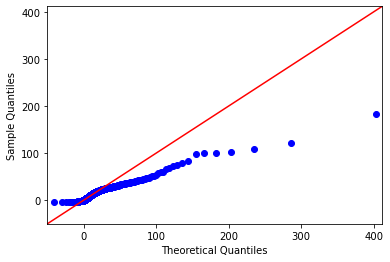

In [281]:
sm.qqplot(sample['ArrDelay'].fillna(0), stats.nct, fit=True,line ='45', color = 'b',)
#Example call of a Q-Q plot

/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Gscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


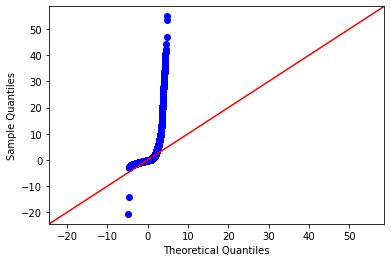

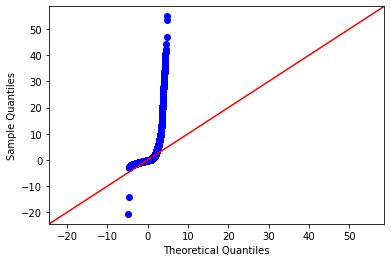

In [256]:
#WARNING: This is a very compute intensive cell!
#It is reccomended to run the example version above


#Below are the two lines required to generate
#The q-q plots for the 2 million flight example
#Q-Q Plot of the Non-Central T-Distribution
sm.qqplot(data['ArrDelay'].fillna(0), stats.nct, fit=True,line ='45', color = 'b',)

#Q-Q plot of the Norm Distribution
sm.qqplot(data['ArrDelay'].fillna(0), stats.norm, fit=True,line ='45', color = 'b',)
